In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy
from scipy.stats import spearmanr
from decimal import Decimal

GenNO22021 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_NO2_20210101-20211231.csv")

GenNO22021 = GenNO22021.replace('n/e', np.NaN)
GenNO22021 = GenNO22021.replace('N/A', np.NaN)

GenNO22021.iloc[:,11:13] = GenNO22021.iloc[:,11:13].replace(np.NaN, 0)

GenNO22021 = pd.DataFrame({'Date': GenNO22021.iloc[:,1],
                          'Nuclear [MWh]': GenNO22021.iloc[:,16],
                          'Biomass [MWh]': GenNO22021.iloc[:,20],
                          'Gas [MWh]': GenNO22021.iloc[:,5],
                          'Coal [MWh]': GenNO22021.iloc[:,6],
                          'Oil [MWh]': GenNO22021.iloc[:,7],
                          'PSH [MWh]': GenNO22021.iloc[:,11] - GenNO22021.iloc[:,12],
                          'Hydro [MWh]': GenNO22021.iloc[:,13] + GenNO22021.iloc[:,14],
                          'Solar [MWh]': GenNO22021.iloc[:,19],
                          'Wind [MWh]': GenNO22021.iloc[:,22]})

print(GenNO22021.to_string())

                                                Date  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0     01.01.2021 00:00 - 01.01.2021 01:00 (CET/CEST)            NaN            6.0        0.0         NaN        NaN      502.0       6727.0          NaN        24.0
1     01.01.2021 01:00 - 01.01.2021 02:00 (CET/CEST)            NaN            6.0        0.0         NaN        NaN      407.0       6306.0          NaN        27.0
2     01.01.2021 02:00 - 01.01.2021 03:00 (CET/CEST)            NaN            6.0        0.0         NaN        NaN      373.0       5667.0          NaN        30.0
3     01.01.2021 03:00 - 01.01.2021 04:00 (CET/CEST)            NaN            6.0        0.0         NaN        NaN      310.0       5513.0          NaN        34.0
4     01.01.2021 04:00 - 01.01.2021 05:00 (CET/CEST)            NaN            6.0        0.0         NaN        NaN      307.0       5481.0          NaN        34.0
5   

In [2]:
def function():
    result = []
    for i in range(0, len(GenNO22021.iloc[:,0])):
        if i < 86:
            start = 24*i
            end = 24*(i+1)
            day = GenNO22021.iloc[start,0]
            opNu = sum(GenNO22021.iloc[start:end,1])
            opBi = sum(GenNO22021.iloc[start:end,2])
            opGa = sum(GenNO22021.iloc[start:end,3])
            opCo = sum(GenNO22021.iloc[start:end,4])
            opOi = sum(GenNO22021.iloc[start:end,5])
            opPS = sum(GenNO22021.iloc[start:end,6])
            opHy = sum(GenNO22021.iloc[start:end,7])
            opSo = sum(GenNO22021.iloc[start:end,8])
            opWi = sum(GenNO22021.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 86: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2066
            end = 2088
            day = GenNO22021.iloc[start,0]
            opNu = sum(GenNO22021.iloc[start:skip,1]) + sum(GenNO22021.iloc[(skip+1):end,1])
            opBi = sum(GenNO22021.iloc[start:skip,2]) + sum(GenNO22021.iloc[(skip+1):end,2])
            opGa = sum(GenNO22021.iloc[start:skip,3]) + sum(GenNO22021.iloc[(skip+1):end,3])
            opCo = sum(GenNO22021.iloc[start:skip,4]) + sum(GenNO22021.iloc[(skip+1):end,4])
            opOi = sum(GenNO22021.iloc[start:skip,5]) + sum(GenNO22021.iloc[(skip+1):end,5])
            opPS = sum(GenNO22021.iloc[start:skip,6]) + sum(GenNO22021.iloc[(skip+1):end,6])
            opHy = sum(GenNO22021.iloc[start:skip,7]) + sum(GenNO22021.iloc[(skip+1):end,7])
            opSo = sum(GenNO22021.iloc[start:skip,8]) + sum(GenNO22021.iloc[(skip+1):end,8])
            opWi = sum(GenNO22021.iloc[start:skip,9]) + sum(GenNO22021.iloc[(skip+1):end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 87 <= i < 303:
            start = 24*i
            end = 24*(i+1)
            day = GenNO22021.iloc[start,0]
            opNu = sum(GenNO22021.iloc[start:end,1])
            opBi = sum(GenNO22021.iloc[start:end,2])
            opGa = sum(GenNO22021.iloc[start:end,3])
            opCo = sum(GenNO22021.iloc[start:end,4])
            opOi = sum(GenNO22021.iloc[start:end,5])
            opPS = sum(GenNO22021.iloc[start:end,6])
            opHy = sum(GenNO22021.iloc[start:end,7])
            opSo = sum(GenNO22021.iloc[start:end,8])
            opWi = sum(GenNO22021.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 303:
            start = 24*i
            skip = 7274
            end = 7297
            day = GenNO22021.iloc[start,0]
            opNu = sum(GenNO22021.iloc[start:skip,1]) + sum(GenNO22021.iloc[skip+2:end,1])
            opBi = sum(GenNO22021.iloc[start:skip,2]) + sum(GenNO22021.iloc[skip+2:end,2])
            opGa = sum(GenNO22021.iloc[start:skip,3]) + sum(GenNO22021.iloc[skip+2:end,3])
            opCo = sum(GenNO22021.iloc[start:skip,4]) + sum(GenNO22021.iloc[skip+2:end,4])
            opOi = sum(GenNO22021.iloc[start:skip,5]) + sum(GenNO22021.iloc[skip+2:end,5])
            opPS = sum(GenNO22021.iloc[start:skip,6]) + sum(GenNO22021.iloc[skip+2:end,6])
            opHy = sum(GenNO22021.iloc[start:skip,7]) + sum(GenNO22021.iloc[skip+2:end,7])
            opSo = sum(GenNO22021.iloc[start:skip,8]) + sum(GenNO22021.iloc[skip+2:end,8])
            opWi = sum(GenNO22021.iloc[start:skip,9]) + sum(GenNO22021.iloc[skip+2:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 304 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenNO22021.iloc[start,0]
            opNu = sum(GenNO22021.iloc[start:end,1])
            opBi = sum(GenNO22021.iloc[start:end,2])
            opGa = sum(GenNO22021.iloc[start:end,3])
            opCo = sum(GenNO22021.iloc[start:end,4])
            opOi = sum(GenNO22021.iloc[start:end,5])
            opPS = sum(GenNO22021.iloc[start:end,6])
            opHy = sum(GenNO22021.iloc[start:end,7])
            opSo = sum(GenNO22021.iloc[start:end,8])
            opWi = sum(GenNO22021.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
    df = pd.DataFrame(result, columns=['Day', 'Nuclear [MWh]', 'Biomass [MWh]', 'Gas [MWh]', 'Coal [MWh]',
                                       'Oil [MWh]', 'PSH [MWh]', 'Hydro [MWh]', 'Solar [MWh]', 'Wind [MWh]'])
    return df

NO2Gen2021 = function().round(2)
NO2Gen2021["Day"] = pd.date_range(start="1/1/2021", periods=365, freq="D")
print(NO2Gen2021.to_string())

           Day  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0   2021-01-01            NaN          135.0        0.0         NaN        NaN    14927.0     172087.0          NaN      1248.0
1   2021-01-02            NaN          131.0        0.0         NaN        NaN    14965.0     174361.0          NaN      4457.0
2   2021-01-03            NaN          135.0        0.0         NaN        NaN    13320.0     164390.0          NaN      8433.0
3   2021-01-04            NaN          129.0        0.0         NaN        NaN    17562.0     178871.0          NaN      5848.0
4   2021-01-05            NaN          141.0        0.0         NaN        NaN    21686.0     189029.0          NaN      3730.0
5   2021-01-06            NaN          134.0        0.0         NaN        NaN    21638.0     185129.0          NaN       838.0
6   2021-01-07            NaN          175.0        0.0         NaN        NaN    21896.0     185087.0  

In [3]:
GenNO22022 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_NO2_20220101-20221231.csv")

GenNO22022 = GenNO22022.replace('n/e', np.NaN)
GenNO22022 = GenNO22022.replace('N/A', np.NaN)

GenNO22022.iloc[:,11:13] = GenNO22022.iloc[:,11:13].replace(np.NaN, 0)

GenNO22022 = pd.DataFrame({'Date': GenNO22022.iloc[:,1],
                          'Nuclear [MWh]': GenNO22022.iloc[:,16],
                          'Biomass [MWh]': GenNO22022.iloc[:,20],
                          'Gas [MWh]': GenNO22022.iloc[:,5],
                          'Coal [MWh]': GenNO22022.iloc[:,6],
                          'Oil [MWh]': GenNO22022.iloc[:,7],
                          'PSH [MWh]': GenNO22022.iloc[:,11] - GenNO22022.iloc[:,12],
                          'Hydro [MWh]': GenNO22022.iloc[:,13] + GenNO22022.iloc[:,14],
                          'Solar [MWh]': GenNO22022.iloc[:,19],
                          'Wind [MWh]': GenNO22022.iloc[:,22]})

print(GenNO22022.to_string())

                                                Date  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0     01.01.2022 00:00 - 01.01.2022 01:00 (CET/CEST)            NaN            4.0        0.0         NaN        NaN        1.0       2501.0          NaN       356.0
1     01.01.2022 01:00 - 01.01.2022 02:00 (CET/CEST)            NaN            5.0        0.0         NaN        NaN        1.0       2503.0          NaN       244.0
2     01.01.2022 02:00 - 01.01.2022 03:00 (CET/CEST)            NaN            4.0        0.0         NaN        NaN        1.0       2639.0          NaN       115.0
3     01.01.2022 03:00 - 01.01.2022 04:00 (CET/CEST)            NaN            4.0        0.0         NaN        NaN        1.0       2267.0          NaN        55.0
4     01.01.2022 04:00 - 01.01.2022 05:00 (CET/CEST)            NaN            4.0        0.0         NaN        NaN        1.0       2255.0          NaN        61.0
5   

In [4]:
def function():
    result = []
    for i in range(0, len(GenNO22022.iloc[:,0])):
        if i < 85:
            start = 24*i
            end = 24*(i+1)
            day = GenNO22022.iloc[start,0]
            opNu = sum(GenNO22022.iloc[start:end,1])
            opBi = sum(GenNO22022.iloc[start:end,2])
            opGa = sum(GenNO22022.iloc[start:end,3])
            opCo = sum(GenNO22022.iloc[start:end,4])
            opOi = sum(GenNO22022.iloc[start:end,5])
            opPS = sum(GenNO22022.iloc[start:end,6])
            opHy = sum(GenNO22022.iloc[start:end,7])
            opSo = sum(GenNO22022.iloc[start:end,8])
            opWi = sum(GenNO22022.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 85: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2042
            end = 2064
            day = GenNO22022.iloc[start,0]
            opNu = sum(GenNO22022.iloc[start:skip,1]) + sum(GenNO22022.iloc[skip+1:end,1])
            opBi = sum(GenNO22022.iloc[start:skip,2]) + sum(GenNO22022.iloc[skip+1:end,2])
            opGa = sum(GenNO22022.iloc[start:skip,3]) + sum(GenNO22022.iloc[skip+1:end,3])
            opCo = sum(GenNO22022.iloc[start:skip,4]) + sum(GenNO22022.iloc[skip+1:end,4])
            opOi = sum(GenNO22022.iloc[start:skip,5]) + sum(GenNO22022.iloc[skip+1:end,5])
            opPS = sum(GenNO22022.iloc[start:skip,6]) + sum(GenNO22022.iloc[skip+1:end,6])
            opHy = sum(GenNO22022.iloc[start:skip,7]) + sum(GenNO22022.iloc[skip+1:end,7])
            opSo = sum(GenNO22022.iloc[start:skip,8]) + sum(GenNO22022.iloc[skip+1:end,8])
            opWi = sum(GenNO22022.iloc[start:skip,9]) + sum(GenNO22022.iloc[skip+1:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 86 <= i < 302:
            start = 24*i
            end = 24*(i+1)
            day = GenNO22022.iloc[start,0]
            opNu = sum(GenNO22022.iloc[start:end,1])
            opBi = sum(GenNO22022.iloc[start:end,2])
            opGa = sum(GenNO22022.iloc[start:end,3])
            opCo = sum(GenNO22022.iloc[start:end,4])
            opOi = sum(GenNO22022.iloc[start:end,5])
            opPS = sum(GenNO22022.iloc[start:end,6])
            opHy = sum(GenNO22022.iloc[start:end,7])
            opSo = sum(GenNO22022.iloc[start:end,8])
            opWi = sum(GenNO22022.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 302:
            start = 24*i
            skip = 7250
            end = 7273
            day = GenNO22022.iloc[start,0]
            opNu = sum(GenNO22022.iloc[start:skip,1]) + sum(GenNO22022.iloc[skip+1:end,1])
            opBi = sum(GenNO22022.iloc[start:skip,2]) + sum(GenNO22022.iloc[skip+1:end,2])
            opGa = sum(GenNO22022.iloc[start:skip,3]) + sum(GenNO22022.iloc[skip+1:end,3])
            opCo = sum(GenNO22022.iloc[start:skip,4]) + sum(GenNO22022.iloc[skip+1:end,4])
            opOi = sum(GenNO22022.iloc[start:skip,5]) + sum(GenNO22022.iloc[skip+1:end,5])
            opPS = sum(GenNO22022.iloc[start:skip,6]) + sum(GenNO22022.iloc[skip+1:end,6])
            opHy = sum(GenNO22022.iloc[start:skip,7]) + sum(GenNO22022.iloc[skip+1:end,7])
            opSo = sum(GenNO22022.iloc[start:skip,8]) + sum(GenNO22022.iloc[skip+1:end,8])
            opWi = sum(GenNO22022.iloc[start:skip,9]) + sum(GenNO22022.iloc[skip+1:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 303 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenNO22022.iloc[start,0]
            opNu = sum(GenNO22022.iloc[start:end,1])
            opBi = sum(GenNO22022.iloc[start:end,2])
            opGa = sum(GenNO22022.iloc[start:end,3])
            opCo = sum(GenNO22022.iloc[start:end,4])
            opOi = sum(GenNO22022.iloc[start:end,5])
            opPS = sum(GenNO22022.iloc[start:end,6])
            opHy = sum(GenNO22022.iloc[start:end,7])
            opSo = sum(GenNO22022.iloc[start:end,8])
            opWi = sum(GenNO22022.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
    df = pd.DataFrame(result, columns=['Day', 'Nuclear [MWh]', 'Biomass [MWh]', 'Gas [MWh]', 'Coal [MWh]',
                                       'Oil [MWh]', 'PSH [MWh]', 'Hydro [MWh]', 'Solar [MWh]', 'Wind [MWh]'])
    return df

NO2Gen2022 = function().round(2)
NO2Gen2022["Day"] = pd.date_range(start="1/1/2022", periods=365, freq="D")
print(NO2Gen2022.to_string())

           Day  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0   2022-01-01            NaN          141.0        0.0         NaN        NaN       24.0      65314.0          NaN     14509.0
1   2022-01-02            NaN          160.0        0.0         NaN        NaN       24.0      66225.0          NaN     11732.0
2   2022-01-03            NaN          123.0        0.0         NaN        NaN       24.0      94422.0          NaN     24470.0
3   2022-01-04            NaN          119.0        0.0         NaN        NaN     4892.0     144336.0          NaN     17878.0
4   2022-01-05            NaN          170.0        0.0         NaN        NaN     2347.0     120507.0          NaN     16208.0
5   2022-01-06            NaN          144.0        0.0         NaN        NaN     7906.0     178586.0          NaN      9482.0
6   2022-01-07            NaN          161.0        0.0         NaN        NaN     4027.0     168278.0  

Date             datetime64[ns]
Wind [MWh]              float64
PSH [MWh]               float64
Hydro [MWh]             float64
Nuclear [MWh]           float64
Gas [MWh]               float64
Oil [MWh]               float64
Coal [MWh]              float64
Biomass [MWh]           float64
Solar [MWh]             float64
dtype: object
Choose generation type: PSH
(-1123.2, 23587.2)
Choose y limit: 25000


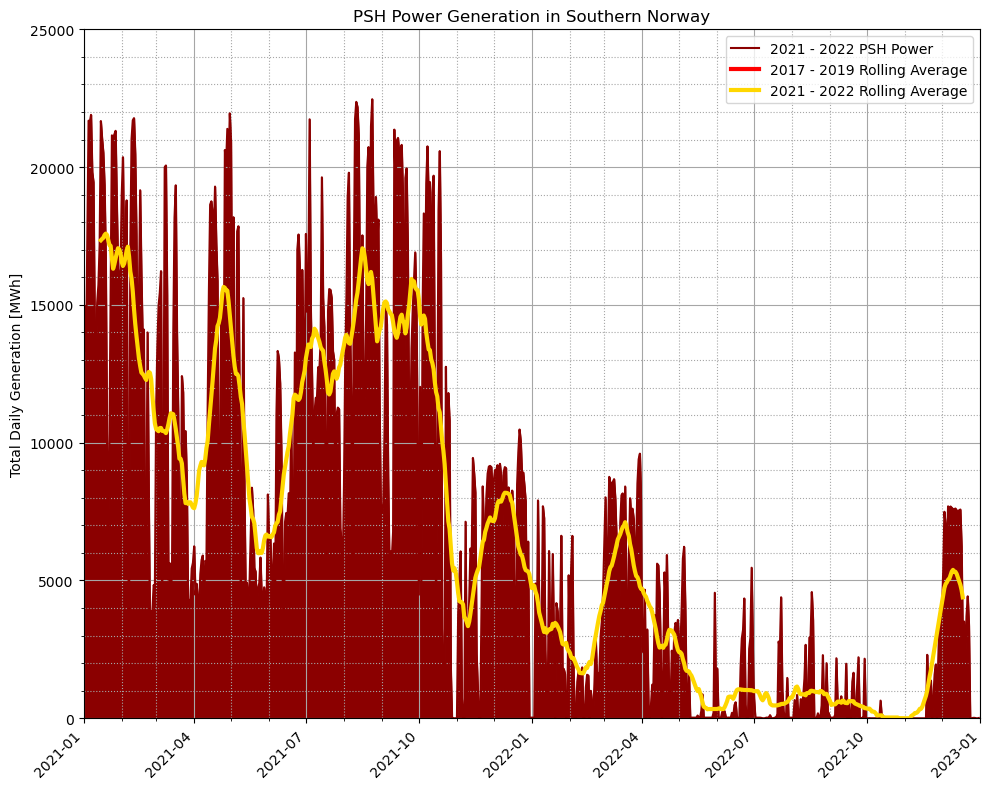

In [17]:
NO2Gen = pd.concat([NO2Gen2021["Wind [MWh]"], NO2Gen2022["Wind [MWh]"]], ignore_index=True).to_frame("Wind [MWh]")
NO2Gen["PSH [MWh]"] = pd.concat([NO2Gen2021["PSH [MWh]"], NO2Gen2022["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]")
NO2Gen["Hydro [MWh]"] = pd.concat([NO2Gen2021["Hydro [MWh]"], NO2Gen2022["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]")
NO2Gen["Nuclear [MWh]"] = pd.concat([NO2Gen2021["Nuclear [MWh]"], NO2Gen2022["Nuclear [MWh]"]], ignore_index=True).to_frame("Nuclear [MWh]")
NO2Gen["Gas [MWh]"] = pd.concat([NO2Gen2021["Gas [MWh]"], NO2Gen2022["Gas [MWh]"]], ignore_index=True).to_frame("Gas [MWh]")
NO2Gen["Oil [MWh]"] = pd.concat([NO2Gen2021["Oil [MWh]"], NO2Gen2022["Oil [MWh]"]], ignore_index=True).to_frame("Oil [MWh]")
NO2Gen["Coal [MWh]"] = pd.concat([NO2Gen2021["Coal [MWh]"], NO2Gen2022["Coal [MWh]"]], ignore_index=True).to_frame("Coal [MWh]")
NO2Gen["Biomass [MWh]"] = pd.concat([NO2Gen2021["Biomass [MWh]"], NO2Gen2022["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")
NO2Gen["Solar [MWh]"] = pd.concat([NO2Gen2021["Biomass [MWh]"], NO2Gen2022["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")

NO2Gen["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]", "Nuclear [MWh]",
            "Gas [MWh]", "Oil [MWh]", "Coal [MWh]", "Biomass [MWh]", "Solar [MWh]"]

#NO2Gen["Wind [MWh]"] = pd.to_numeric(NO2Gen["Wind [MWh]"], errors='coerce')
NO2Gen = pd.DataFrame(NO2Gen)

#NO2Gen["BZN|FR"] = NO2Gen["BZN|FR"].round(2)

NO2Gen = NO2Gen.reindex(columns=NewOrder)

print(NO2Gen.dtypes)


######################################################################################################################

%store -r NO2Genpc

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

a = input("Choose generation type: ", )

plt.title(f"{a} Power Generation in Southern Norway")
plt.ylabel('Total Daily Generation [MWh]')

plt.fill_between(NO2Gen["Date"], NO2Gen[f"{a} [MWh]"], color="darkred")
ax.plot(NO2Gen["Date"], NO2Gen[f"{a} [MWh]"], color="darkred", label=f"2021 - 2022 {a} Power")
ax.plot(NO2Gen["Date"], NO2Genpc[f"{a} Mean [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "red", label="2017 - 2019 Rolling Average")
ax.plot(NO2Gen["Date"], NO2Gen[f"{a} [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="2021 - 2022 Rolling Average")


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_ylim())
b = input("Choose y limit: ", )

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0,int(b))
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [16]:
CorrNO2 = pd.DataFrame(columns = ["Generation", "Max. Value", "rho", "p", "m", "c", "a", "b"])

Choose generation type: PSH
rho: -0.39819825618644455
p: 3.7636057064957814e-29
Linear or Exponential [l/e]:   e
x min:  0.0
x max:  22.464
Choose textbox x-coordinate [0.00-1.00]: 0.05
Choose min x limit: 0
Choose max x limit: 25


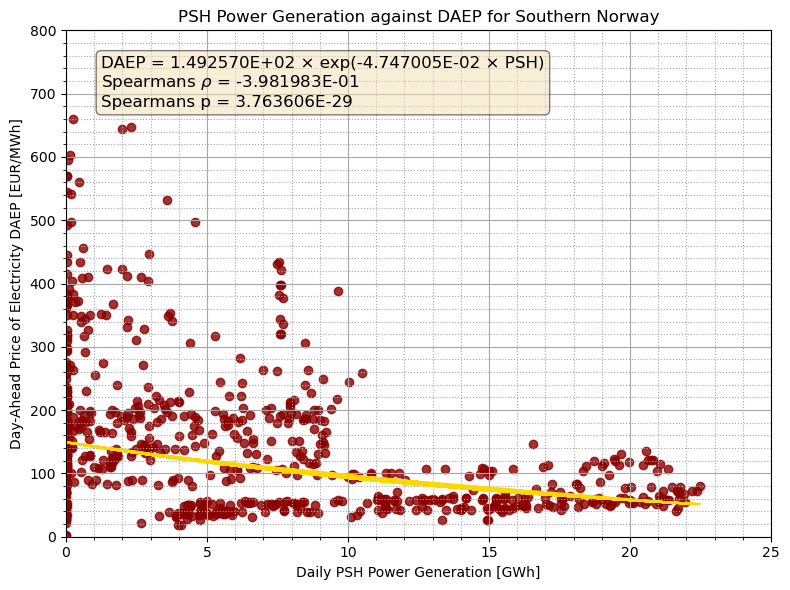

  Generation  Max. Value       rho             p   m   c         a           b
0        PSH     22464.0 -0.398198  3.763606e-29 NaN NaN -0.047470  149.256962
1      Hydro    209428.0 -0.198440  6.436587e-08 NaN NaN -0.003564  164.196461
Stored 'CorrNO2' (DataFrame)


In [19]:
# We have to import this again to avoid errors inherent errors in indexing

NO2Gen = pd.concat([NO2Gen2021["Wind [MWh]"], NO2Gen2022["Wind [MWh]"]], ignore_index=True).to_frame("Wind [MWh]")
NO2Gen["PSH [MWh]"] = pd.concat([NO2Gen2021["PSH [MWh]"], NO2Gen2022["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]")
NO2Gen["Hydro [MWh]"] = pd.concat([NO2Gen2021["Hydro [MWh]"], NO2Gen2022["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]")
NO2Gen["Nuclear [MWh]"] = pd.concat([NO2Gen2021["Nuclear [MWh]"], NO2Gen2022["Nuclear [MWh]"]], ignore_index=True).to_frame("Nuclear [MWh]")
NO2Gen["Gas [MWh]"] = pd.concat([NO2Gen2021["Gas [MWh]"], NO2Gen2022["Gas [MWh]"]], ignore_index=True).to_frame("Gas [MWh]")
NO2Gen["Oil [MWh]"] = pd.concat([NO2Gen2021["Oil [MWh]"], NO2Gen2022["Oil [MWh]"]], ignore_index=True).to_frame("Oil [MWh]")
NO2Gen["Coal [MWh]"] = pd.concat([NO2Gen2021["Coal [MWh]"], NO2Gen2022["Coal [MWh]"]], ignore_index=True).to_frame("Coal [MWh]")
NO2Gen["Biomass [MWh]"] = pd.concat([NO2Gen2021["Biomass [MWh]"], NO2Gen2022["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")
NO2Gen["Solar [MWh]"] = pd.concat([NO2Gen2021["Biomass [MWh]"], NO2Gen2022["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")

NO2Gen["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]", "Nuclear [MWh]",
            "Gas [MWh]", "Oil [MWh]", "Coal [MWh]", "Biomass [MWh]", "Solar [MWh]"]

NO2Gen = pd.DataFrame(NO2Gen)

NO2Gen = NO2Gen.reindex(columns=NewOrder)


######################################################################################################################

%store -r BZNO2

NO2Gen["NO2 DAEP [EUR/MWh]"] = BZNO2["BZN|NO2"].astype(float)

NewOrder = ["Date", "NO2 DAEP [EUR/MWh]", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]", "Nuclear [MWh]",
            "Gas [MWh]", "Oil [MWh]", "Coal [MWh]", "Biomass [MWh]", "Solar [MWh]"]

#NO2Gen = pd.DataFrame(NO2Gen)

NO2Gen = NO2Gen.reindex(columns=NewOrder)

######################################################################################################################

fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)

a = input("Choose generation type: ", )

x_data = np.array(NO2Gen[f"{a} [MWh]"])
y_data = np.array(NO2Gen["NO2 DAEP [EUR/MWh]"])

d = max(NO2Gen[f"{a} [MWh]"])

if d > 1000000:
    x_data = x_data/1000000
elif 1000000 > d > 1000:
    x_data = x_data/1000

rhoNO2, pNO2 = spearmanr(x_data, y_data)

print("rho:", rhoNO2)
print("p:",pNO2)

b = input("Linear or Exponential [l/e]:   ", )


for c in b:
    if c == "l":
        sns.regplot(x=x_data, 
            y=NO2Gen["NO2 DAEP [EUR/MWh]"].astype(float), 
            scatter = True, ci = 100, fit_reg = True,
            scatter_kws = {"color": "darkred"}, line_kws = {"color": "gold"}, order=1)
        
        slope, intercept, r, NO2Gen, sterr = scipy.stats.linregress(x=x_data.astype(float),
                                                       y=NO2Gen["NO2 DAEP [EUR/MWh]"].astype(float))

        textstr = '\n'.join((
            'DAEP = ' + str('%.6E' % Decimal(slope)) + f' × {a} + ' + str('%.6E' % Decimal(intercept)),
            'Spearmans ' + r'$\rho$'' = ' + str('%.6E' % Decimal(rhoNO2)),
            'Spearmans p = ' + str('%.6E' % Decimal(pNO2))))
        
        MNO2 = slope
        CNO2 = intercept
        ANO2 = np.NaN
        BNO2 = np.NaN
        
        CorrNO2.loc[-1] = [f"{a}", d, rhoNO2, pNO2, MNO2, CNO2, ANO2, BNO2]  # adding a row
        CorrNO2.index = CorrNO2.index + 1  # shifting index
        CorrNO2 = CorrNO2.sort_index()

    elif c == "e":
        sns.regplot(x=x_data, 
            y=NO2Gen["NO2 DAEP [EUR/MWh]"].astype(float), 
            scatter = True, ci = 100, fit_reg = False,
            scatter_kws = {"color": "darkred"}, order=1)
        
        log_y_data = np.log(y_data)

        curve_fit = np.polyfit(x_data, log_y_data, 1)

        ycurve = np.exp(curve_fit[1])*np.exp(curve_fit[0]*x_data)

        plt.plot(x_data, ycurve, color="gold")

        A = curve_fit[0]
        B = np.exp(curve_fit[1])
        
        textstr = '\n'.join((
            'DAEP = ' + str('%.6E' % Decimal(B)) + ' × exp(' + str('%.6E' % Decimal(A)) + f' × {a})',
            'Spearmans ' + r'$\rho$'' = ' + str('%.6E' % Decimal(rhoNO2)),
            'Spearmans p = ' + str('%.6E' % Decimal(pNO2))))
        
        MNO2 = np.NaN
        CNO2 = np.NaN
        ANO2 = A
        BNO2 = B
        
        CorrNO2.loc[-1] = [f"{a}", d, rhoNO2, pNO2, MNO2, CNO2, ANO2, BNO2]  # adding a row
        CorrNO2.index = CorrNO2.index + 1  # shifting index
        CorrNO2 = CorrNO2.sort_index()
        
print("x min: ", min(x_data))
print("x max: ", max(x_data))
        
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

xb = input("Choose textbox x-coordinate [0.00-1.00]: ", )

ax.text(float(xb), 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

plt.title(f'{a} Power Generation against DAEP for Southern Norway')

if 1000 > d:
    plt.xlabel(f'Daily {a} Power Generation [MWh]')
elif 1000000 > d > 1000:
    plt.xlabel(f'Daily {a} Power Generation [GWh]')
elif d > 1000000:
    plt.xlabel(f'Daily {a} Power Generation [TWh]')

plt.ylabel('Day-Ahead Price of Electricity DAEP [EUR/MWh]')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

m = input("Choose min x limit: ", )
n = input("Choose max x limit: ", )

plt.xlim(float(m), float(n))
plt.ylim(0, 800)
plt.tight_layout()

plt.show()

print(CorrNO2)
%store CorrNO2

In [8]:
r = BNO2*np.exp(ANO2*25)
print(r)

150.20068044929852
